In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import pickle

%matplotlib inline

In [3]:
train_df = pd.read_csv('./data/train_sessions.csv', index_col='session_id')
test_df = pd.read_csv('./data/test_sessions.csv', index_col='session_id')

In [4]:
time_columns = ['time%d' % i for i in range(1, 11)]
train_df[time_columns] = train_df[time_columns].apply(pd.to_datetime)
test_df[time_columns] = test_df[time_columns].apply(pd.to_datetime)

site_columns = ['site%d' % i for i in range(1, 11)]
train_df[site_columns] = train_df[site_columns].fillna(0).astype('int')

In [5]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

In [6]:
target_proportion = int(train_df[train_df['target'] == 0].shape[0] / 
                        train_df[train_df['target'] == 1].shape[0])
target_proportion

109

In [7]:
train_df_alice = train_df[train_df['target'] == 1].copy()
train_df_non_alice = train_df[train_df['target'] == 0].copy()

### time in train and test

In [8]:
print(sorted(train_df['time1'].apply(lambda dt: dt.year * 100 + dt.month).unique()))

[201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404]


In [9]:
print(sorted(test_df['time1'].apply(lambda dt: dt.year * 100 + dt.month).unique()))

[201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


### month in years

In [10]:
train_df_alice['time1_year'] = train_df_alice['time1'].apply(lambda dt: dt.year).astype('int')
train_df_alice_2013_month = train_df_alice[train_df_alice['time1_year'] == 2013]['time1'].apply(lambda dt: dt.month).astype('int')
train_df_alice_2014_month = train_df_alice[train_df_alice['time1_year'] == 2014]['time1'].apply(lambda dt: dt.month).astype('int')

In [11]:
train_df_non_alice['time1_year'] = train_df_non_alice['time1'].apply(lambda dt: dt.year).astype('int')
train_df_non_alice_2013_month = train_df_non_alice[train_df_non_alice['time1_year'] == 2013]['time1'].apply(lambda dt: dt.month).astype('int')
train_df_non_alice_2014_month = train_df_non_alice[train_df_non_alice['time1_year'] == 2014]['time1'].apply(lambda dt: dt.month).astype('int')

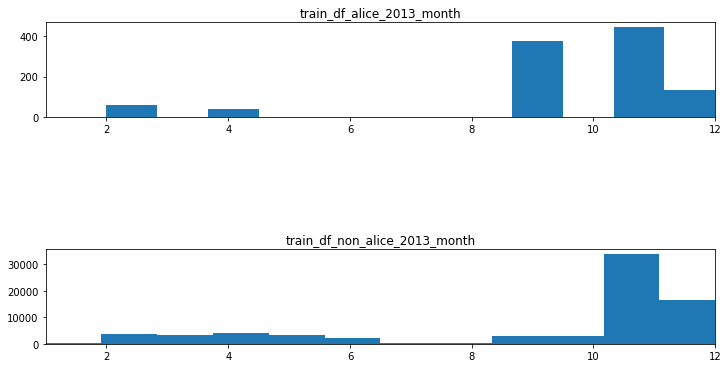

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.title('train_df_alice_2013_month')
plt.hist(train_df_alice_2013_month, bins=12)
plt.xlim(1, 12)

plt.subplot(413)
plt.title('train_df_non_alice_2013_month')
plt.hist(train_df_non_alice_2013_month, bins=12)
plt.xlim(1, 12)

plt.show()

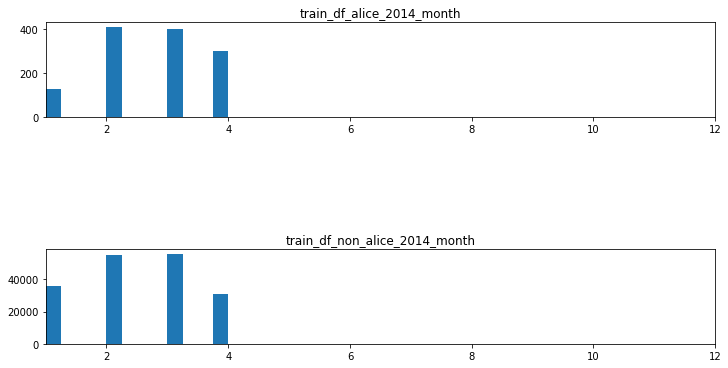

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(412)
plt.title('train_df_alice_2014_month')
plt.hist(train_df_alice_2014_month, bins=12)
plt.xlim(1, 12)

plt.subplot(414)
plt.title('train_df_non_alice_2014_month')
plt.hist(train_df_non_alice_2014_month, bins=12)
plt.xlim(1, 12)

plt.show()

### year_month days

In [14]:
lambda_func = lambda dt: dt.year * 100 + dt.month

train_df_alice['year_month'] = train_df_alice['time1'].apply(lambda_func)
train_df_non_alice['year_month'] = train_df_non_alice['time1'].apply(lambda_func)

In [15]:
train_df_alice['year_month'].value_counts()

201311    446
201402    410
201403    400
201309    377
201404    302
201312    134
201401    129
201302     61
201304     38
Name: year_month, dtype: int64

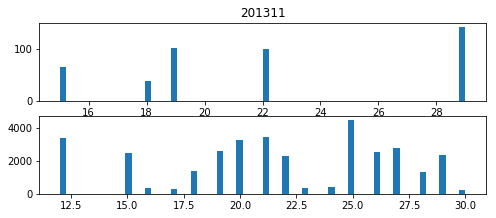

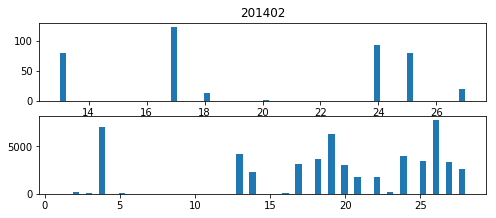

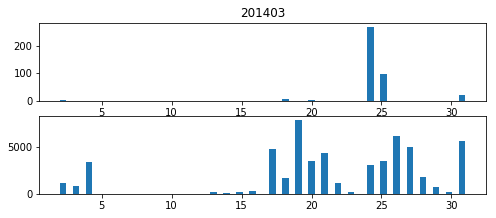

In [16]:
days_to_show = [201311, 201402, 201403]

for pos, days in enumerate(days_to_show):

    alice_index = train_df_alice[train_df_alice['year_month'] == days].index
    non_alice_index = train_df_non_alice[train_df_non_alice['year_month'] == days].index
    
    plt.figure(figsize=(8, 10))

    plt.subplot(610 + pos*2 + 1)
    plt.title(str(days))
    plt.hist(train_df_alice.loc[alice_index]['time1'].apply(lambda dt: dt.day), bins=62)

    plt.subplot(610 + pos*2 + 2)
    plt.hist(train_df_non_alice.loc[non_alice_index]['time1'].apply(lambda dt: dt.day), bins=62)

    plt.show()

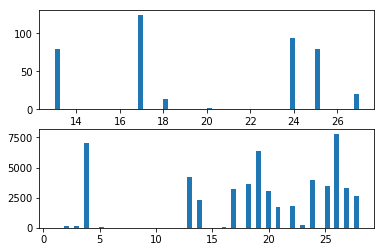

In [17]:
alice_index_201402 = train_df_alice[train_df_alice['year_month'] == 201402].index
non_alice_index_201402 = train_df_non_alice[train_df_non_alice['year_month'] == 201402].index

plt.subplot(211)
plt.hist(train_df_alice.loc[alice_index_201402]['time1'].apply(lambda dt: dt.day), bins=62)

plt.subplot(212)
plt.hist(train_df_non_alice.loc[non_alice_index_201402]['time1'].apply(lambda dt: dt.day), bins=62)

plt.show()

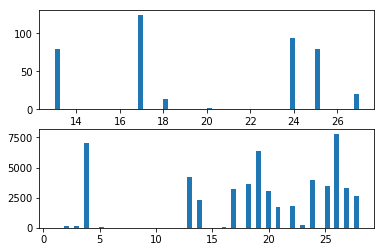

In [18]:
alice_index_201402 = train_df_alice[train_df_alice['year_month'] == 201402].index
non_alice_index_201402 = train_df_non_alice[train_df_non_alice['year_month'] == 201402].index

plt.subplot(211)
plt.hist(train_df_alice.loc[alice_index_201402]['time1'].apply(lambda dt: dt.day), bins=62)

plt.subplot(212)
plt.hist(train_df_non_alice.loc[non_alice_index_201402]['time1'].apply(lambda dt: dt.day), bins=62)

plt.show()

### year_month

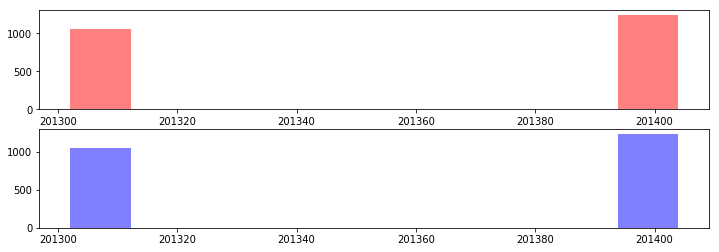

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(211)
plt.hist(train_df_alice['year_month'], color='red', alpha=0.5)

plt.subplot(212)
plt.hist(train_df_alice['year_month'], color='blue', alpha=0.5)

plt.show()

### dayofweek

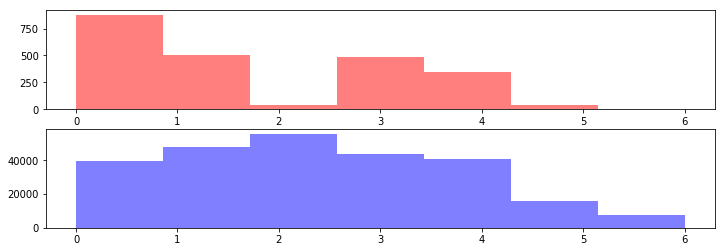

In [43]:
# Monday=0, Sunday=6

lambda_func = lambda dt: dt.dayofweek

plt.figure(figsize=(12, 4))

plt.subplot(211)
plt.hist(train_df_alice['time1'].apply(lambda_func), color='red', alpha=0.5, bins=7)

plt.subplot(212)
plt.hist(train_df_non_alice['time1'].apply(lambda_func), color='blue', alpha=0.5, bins=7)
plt.show()

In [54]:
train_df_alice['time1'].apply(lambda_func).value_counts().sort_values()

6      1
2     38
5     41
4    346
3    487
1    508
0    876
Name: time1, dtype: int64

(array([10581., 15125.,  8078., 12361., 16515.,  9869., 10268.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

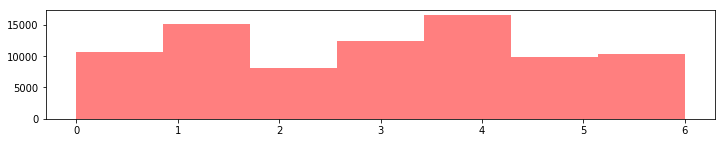

In [45]:
# Monday=0, Sunday=6

lambda_func = lambda dt: dt.dayofweek

plt.figure(figsize=(12, 2))

plt.hist(test_df['time1'].apply(lambda_func), color='red', alpha=0.5, bins=7)

### start_hour

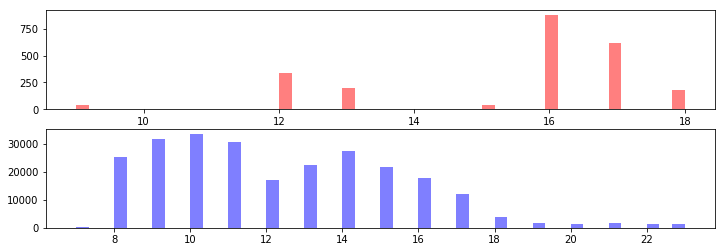

In [21]:
lambda_func = lambda dt: dt.hour

plt.figure(figsize=(12, 4))

plt.subplot(211)
plt.hist(train_df_alice['time1'].apply(lambda_func), color='red', alpha=0.5, bins=48)

plt.subplot(212)
plt.hist(train_df_non_alice['time1'].apply(lambda_func), color='blue', alpha=0.5, bins=48)

plt.show()

In [22]:
train_df_alice['time1'].apply(lambda dt: dt.hour).value_counts()

16    879
17    618
12    340
13    196
18    179
15     40
9      38
14      4
11      3
Name: time1, dtype: int64

### session_duration

In [23]:
def get_session_duration(row):
    last_valid_time = None
    for col in range(len(row), 0, -1):
        current_time_col = 'time{}'.format(col)
        if not (pd.isnull(row[current_time_col])):
            return (row[current_time_col] - row['time1']).seconds
        
alice_session_durations = train_df_alice[time_columns].apply(get_session_duration, axis=1)
non_alice_session_durations = train_df_non_alice[time_columns].apply(get_session_duration, axis=1)

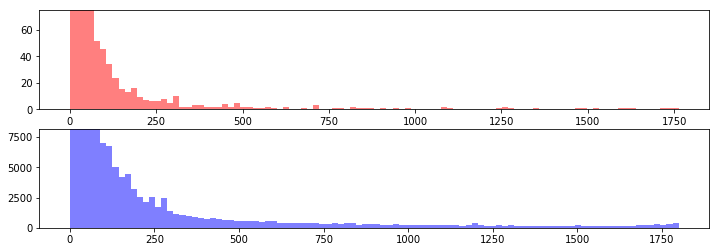

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(211)
plt.hist(alice_session_durations, color='red', alpha=0.5, bins=100)
plt.ylim(0, 75)

plt.subplot(212)
plt.hist(non_alice_session_durations, color='blue', alpha=0.5, bins=100)
plt.ylim(0, 75 * target_proportion)

plt.show()

### session_length

In [25]:
def get_session_length(row):
    notnulls = [int(not pd.isnull(row[col])) for col in range(row.shape[0])]
    return sum(notnulls)

alice_session_lengths = train_df_alice[time_columns].apply(get_session_length, axis=1)
non_alice_session_lengths = train_df_non_alice[time_columns].apply(get_session_length, axis=1)

In [26]:
len(train_df_alice[['time1', 'time2']].shape)

2

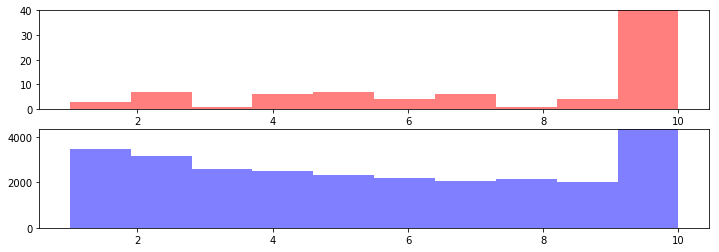

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(211)
plt.hist(alice_session_lengths, color='red', alpha=0.5)
plt.ylim(0, 40)

plt.subplot(212)
plt.hist(non_alice_session_lengths, color='blue', alpha=0.5)
plt.ylim(0, 40 * target_proportion)

plt.show()

### unique_sites

In [28]:
def count_unique_sites(row):
    sites = [row[col] for col in range(row.shape[0])]
    return len(set(sites))

In [29]:
train_df_alice['unique_sites'] = train_df_alice[site_columns].apply(count_unique_sites, axis=1)
train_df_non_alice['unique_sites'] = train_df_non_alice[site_columns].apply(count_unique_sites, axis=1)

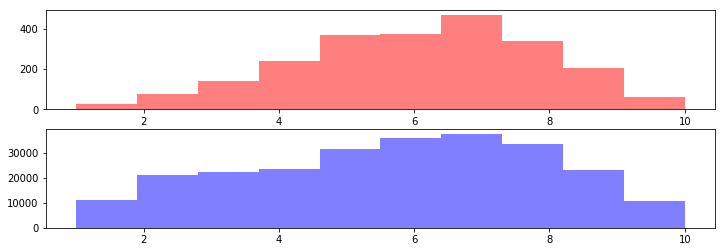

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(211)
plt.hist(train_df_alice['unique_sites'], color='red', alpha=0.5)
#plt.ylim(0, 40)

plt.subplot(212)
plt.hist(train_df_non_alice['unique_sites'], color='blue', alpha=0.5)
#plt.ylim(0, 40 * target_proportion)

plt.show()

### mean time per site

In [31]:
def mean_time_per_site(row):
    times = []
    for col in range(2, len(row) + 1):
        current_time = row['time{}'.format(col)]
        prev_time = row['time{}'.format(col - 1)]
        if(pd.isnull(current_time)):
            break
        times.append((current_time - prev_time).seconds)
    if(len(times) == 0):
        return 30.0*60.0 # one site for 30-minute session
    else:
        return np.mean(times)

In [32]:
train_df_alice['mean_time_per_site'] = train_df_alice[time_columns].apply(mean_time_per_site, axis=1)
train_df_non_alice['mean_time_per_site'] = train_df_non_alice[time_columns].apply(mean_time_per_site, axis=1)

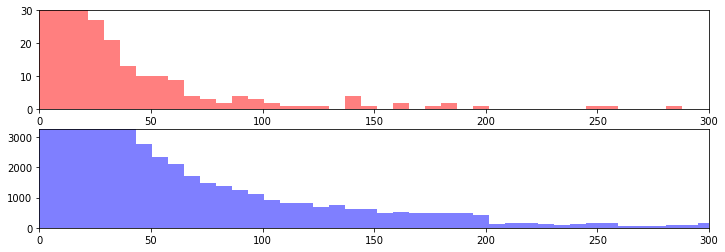

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(211)
plt.hist(train_df_alice['mean_time_per_site'], color='red', alpha=0.5, bins=250)
plt.ylim(0, 30)
plt.xlim(0, 300)

plt.subplot(212)
plt.hist(train_df_non_alice['mean_time_per_site'], color='blue', alpha=0.5, bins=250)
plt.ylim(0, 30 * target_proportion)
plt.xlim(0, 300)

plt.show()

### top alice sites

In [34]:
with open('./data/site_dic.pkl', 'rb') as sites_file:
    sites_dict = pickle.load(sites_file)
    
sites_dict[''] = 0
    
reverse_sites_dict = {val: key for (key, val) in sites_dict.items()}

In [35]:
alice_sites = Counter()
for idx, row in train_df_alice.iterrows():
    row_sites = [int(row['site{}'.format(index)]) for index in range(1, 11)]
    alice_sites += Counter(row_sites)

In [36]:
len(alice_sites)

1054

In [37]:
alice_sites.most_common(10)

[(77, 1382),
 (80, 1354),
 (76, 1307),
 (29, 897),
 (21, 857),
 (81, 609),
 (22, 522),
 (879, 522),
 (75, 451),
 (82, 447)]

In [38]:
top_10_alice_sites = {reverse_sites_dict[key]: val for (key, val) in alice_sites.most_common(10)}
top_10_alice_sites

{'apis.google.com': 522,
 'i1.ytimg.com': 1382,
 'r1---sn-gxo5uxg-jqbe.googlevideo.com': 522,
 'r2---sn-gxo5uxg-jqbe.googlevideo.com': 447,
 'r4---sn-gxo5uxg-jqbe.googlevideo.com': 609,
 's.youtube.com': 1354,
 's.ytimg.com': 451,
 'www.facebook.com': 897,
 'www.google.fr': 857,
 'www.youtube.com': 1307}

### top non-alice sites

In [39]:
non_alice_sites = Counter()
for idx, row in train_df_non_alice.iterrows():
    row_sites = [int(row['site{}'.format(index)]) for index in range(1, 11)]
    non_alice_sites += Counter(row_sites)

In [40]:
len(non_alice_sites)

41412

In [41]:
non_alice_sites.most_common(10)

[(21, 122919),
 (0, 122529),
 (23, 87182),
 (782, 77055),
 (22, 57736),
 (29, 53197),
 (167, 46355),
 (780, 43841),
 (778, 38194),
 (52, 35879)]

In [42]:
top_10_non_alice_sites = {reverse_sites_dict[key]: val for (key, val) in non_alice_sites.most_common(10)}
top_10_non_alice_sites

{'': 122529,
 'annotathon.org': 77055,
 'apis.google.com': 57736,
 'blast.ncbi.nlm.nih.gov': 43841,
 'clients1.google.com': 35879,
 'www.bing.com': 46355,
 'www.facebook.com': 53197,
 'www.google.com': 87182,
 'www.google.fr': 122919,
 'www.ncbi.nlm.nih.gov': 38194}